In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
import numpy as np


In [ ]:
iris=load_iris()

X = iris.data
Y = iris.target

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [ ]:
# Logistic Regression
logreg=LogisticRegression()

#train
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#test
Y_hat=logreg.predict(X_test)
metrics.accuracy_score(Y_test,Y_hat)

0.9666666666666667

In [ ]:
# KNN

Scores=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    #train
    knn.fit(X_train,Y_train)
    #test
    Y_hat=knn.predict(X_test)
    Scores.append(metrics.accuracy_score(Y_test,Y_hat))
print("Max Score is =>",np.max(Scores), "\nWith K value =>",np.argmax(Scores))

Max Score is => 0.9833333333333333 
With K value => 5


Text(0, 0.5, 'Output scores')

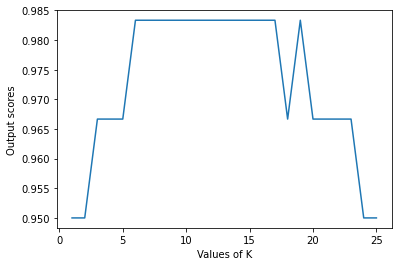

In [ ]:
plt.plot(range(1,26),Scores)
plt.xlabel("Values of K")
plt.ylabel("Output scores")


In [ ]:
#knn
scores=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    temp_score=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    scores.append(temp_score.mean())

print("Max Score is =>",np.max(scores), "\nWith K value =>",np.argmax(scores))
print("Min Score is =>",np.min(scores), "\nWith K value =>",np.argmin(scores))
print("Mean of all scores is =>", np.mean(scores))

Max Score is => 0.9800000000000001 
With K value => 12
Min Score is => 0.9533333333333334 
With K value => 1
Mean of all scores is => 0.9693333333333333


Text(0, 0.5, 'croos validated accuracy')

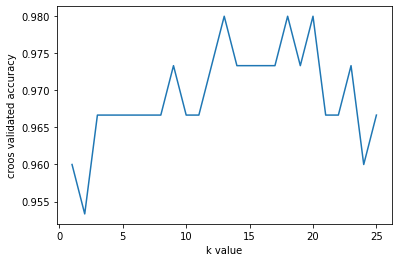

In [ ]:
plt.plot(range(1,26),scores)
plt.xlabel("k value")
plt.ylabel("croos validated accuracy")

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12) #12 because in last step of knn with cross validation, max score we got was at k=12 
print( cross_val_score(knn,X,Y,cv=10,scoring='accuracy').mean() )

lorg=LogisticRegression()
print( cross_val_score(lorg,X,Y,cv=10,scoring='accuracy').mean() )


0.9733333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9733333333333334
